In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_mldata
from Mixture import BernoulliMixture

```python 
(x_train > 127).astype(np.float)
``` 
The digit images have been turned into binary vectors by setting all elements whose values exceed 0.5 (maximum value is 256) to 1 and setting the remaining elements to 0.

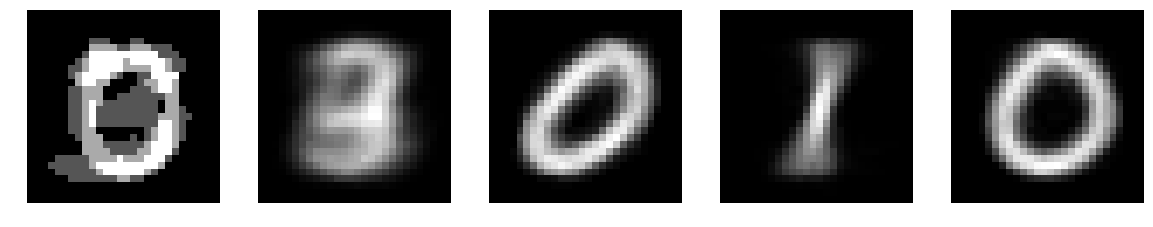

In [2]:
# fetch_mldata is DEPRECATED. Updated method if Colab updates sklearn
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# print(X.shape)
# print(y.shape)

mnist = fetch_mldata("MNIST original")
x = mnist.data
y = mnist.target
x_train = []
for i in [0, 1, 2, 3, 4]:
    x_train.append(x[np.random.choice(np.where(y == i)[0], 200)])
x_train = np.concatenate(x_train, axis=0)
x_train = (x_train > 127).astype(np.float)

bm = BernoulliMixture(n_components=5)
bm.fit(x_train)

plt.figure(figsize=(20, 5))
for i, mean in enumerate(bm.mu):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mean.reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.show()